In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Read in dataframes with input and assembled counts and concatenate them.

In [2]:
dfs = []
samples = [
    "PCR_small_rep1", "PCR_large_rep1", "PCR_small_rep2", "PCR_large_rep2",
    "LIG_small_rep1", "LIG_large_rep1", "LIG_small_rep2", "LIG_large_rep2", 
]

for sample in samples:
    file = f"../data/20230414_pipeline_run/output/counts/{sample}_count_df.pkl"
    df = pd.read_pickle(file)
    df['sample'] = sample
    dfs.append(df)

counts_df = pd.concat(dfs, ignore_index=True)
print(counts_df.head())

                         sequence  input_count  assembled_count  \
0  ACTTCAACAAGAATTGGAGGCCCTCTTGGG          335              324   
1  ATCTCTAATATAGTGCAAGTACAGCGGCAG          384              314   
2  TTTTCGGCGAGTTGCACCTGGCCAGTATTG          119              145   
3  TGGTGCTACCGCGAATCGTACCGGGGAGTG           22               23   
4  ATAGAAGGACCCCTTAATACTGACAACGAT           90              118   

           sample  
0  PCR_small_rep1  
1  PCR_small_rep1  
2  PCR_small_rep1  
3  PCR_small_rep1  
4  PCR_small_rep1  


Make sure "LIG" samples all have sequence length of 28 and "PCR" samples all have sequence length of 30.

In [3]:
assert set(counts_df[counts_df['sample'].str.contains("LIG")]['sequence'].apply(len)) == {28}
assert set(counts_df[counts_df['sample'].str.contains("PCR")]['sequence'].apply(len)) == {30}

Look at distribution of input and assembled read counts for each sample.

In [4]:
def plot_count_dist(df, samples, timepoint, bins=100):
    g = sns.FacetGrid(df, col="sample", col_wrap=4, col_order=samples, sharey=False)
    g.map(sns.histplot, f"{timepoint}_count", bins=range(bins))
    g.set_xlabels("Count")
    g.set_titles("{col_name}")
    g.figure.suptitle(f"Distribution of {timepoint} read counts", size=12)
    g.figure.subplots_adjust(top=0.8)
    plt.tight_layout()
    plt.show()

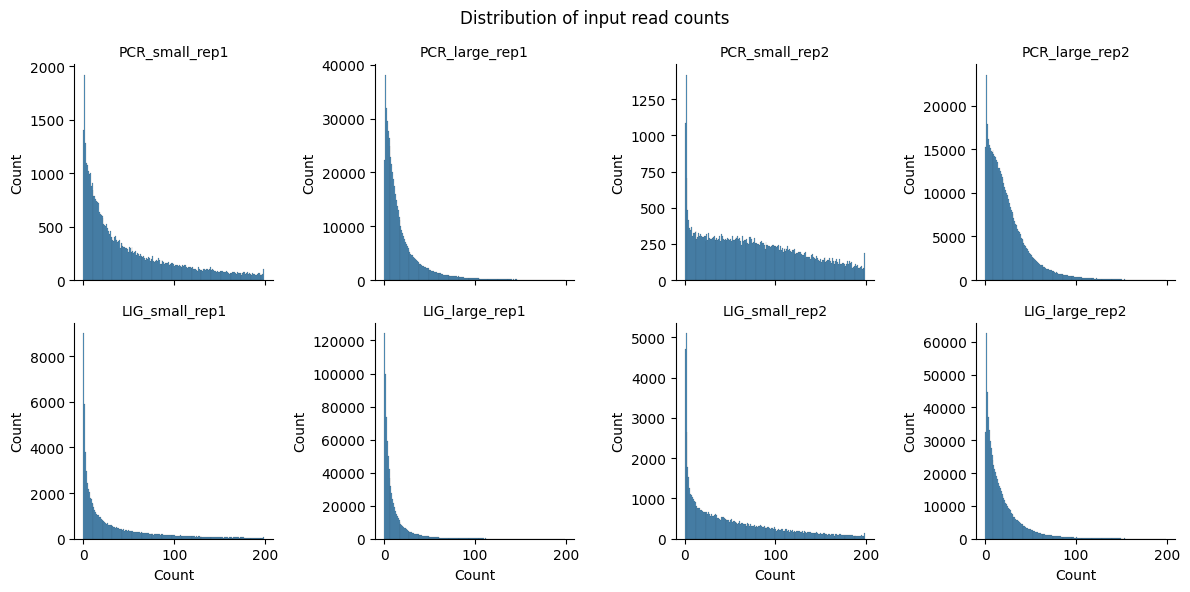

In [5]:
plot_count_dist(counts_df, samples, 'input', bins=200)

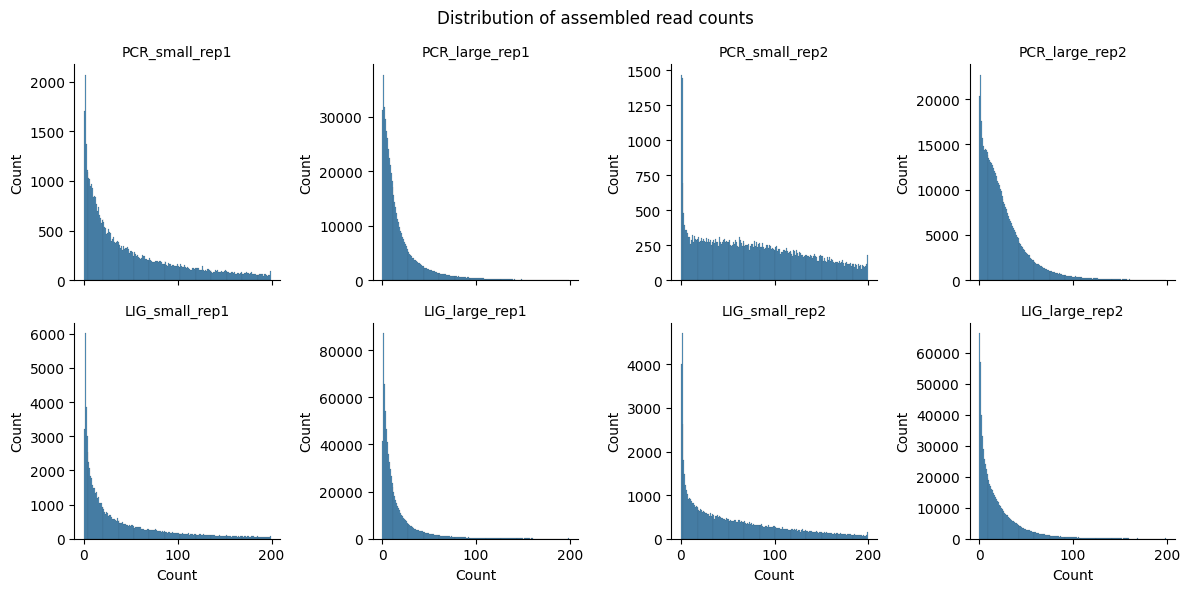

In [6]:
plot_count_dist(counts_df, samples, 'assembled', bins=200)

Check statistics of read counts for each sample.

In [12]:
grouped = counts_df.groupby('sample')[['input_count', 'assembled_count']].agg(['count', 'mean', 'median', 'max', 'std'])
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()
# print(grouped)

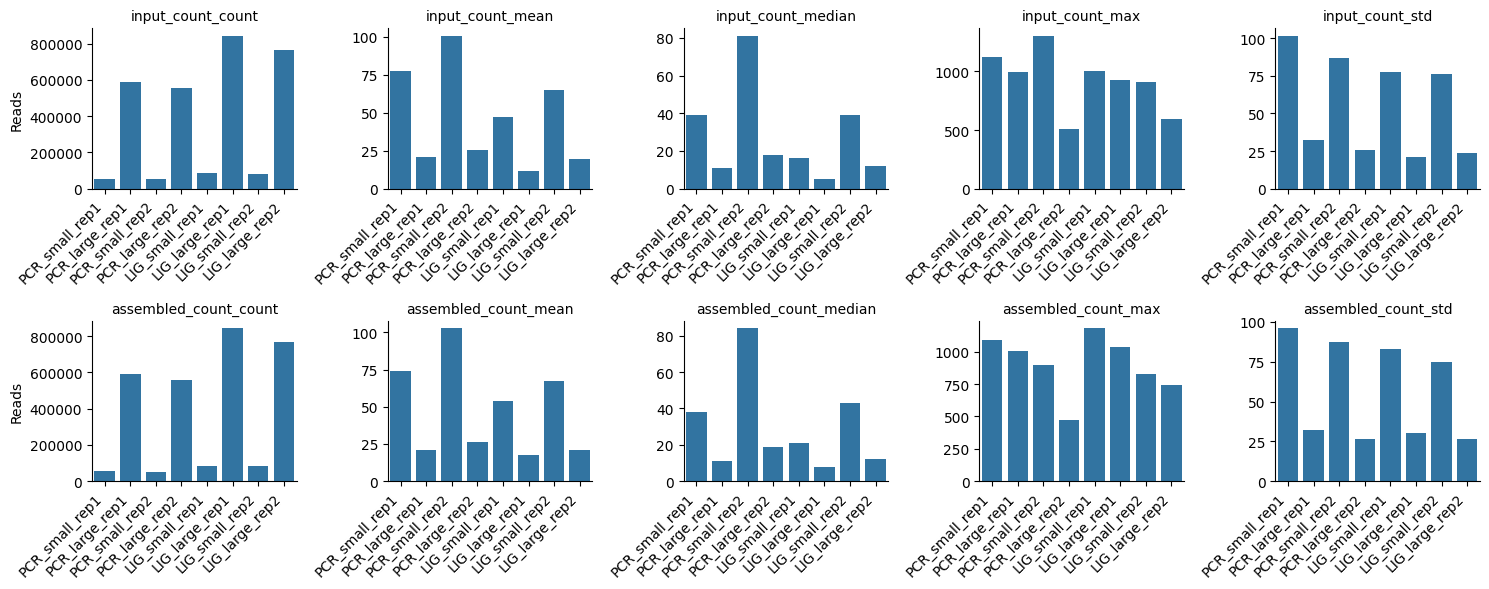

In [13]:
melted = pd.melt(grouped, id_vars=['sample'], var_name='stat_count', value_name='value')
g = sns.FacetGrid(melted, col='stat_count', sharey=False, sharex=False, col_wrap=5)
g.map(sns.barplot, 'sample', 'value', order=samples)
g.set_axis_labels('', 'Reads')
g.set_titles("{col_name}")
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()